In [1]:
import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt 

file_list = [file for file in os.listdir() if file.endswith('.csv')]
print(file_list)

['no_system_prompt_harmful_testing_gemma_classification_finetuned_alpaca_style_evaluator_results.csv', 'no_system_prompt_harmful_testing_gemma_translation_finetuned_alpaca_style_evaluator_results.csv', 'no_system_prompt_harmful_testing_gemma_code_finetuned_gemma_style_evaluator_results.csv', 'system_prompt_harmful_testing_gemma_code_finetuned_alpaca_style_evaluator_results.csv', 'no_system_prompt_harmful_testing_gemma_translation_finetuned_gemma_style_evaluator_results.csv', 'no_system_prompt_harmful_testing_gemma_code_finetuned_alpaca_style_evaluator_results.csv', 'system_prompt_harmful_testing_gemma_summerization_finetuned_alpaca_style_evaluator_results.csv', 'no_system_prompt_harmful_testing_gemma_classification_finetuned_gemma_style_evaluator_results.csv', 'no_system_prompt_harmful_testing_gemma_summerization_finetuned_alpaca_style_evaluator_results.csv', 'system_prompt_harmful_testing_gemma_summerization_finetuned_gemma_style_evaluator_results.csv', 'system_prompt_harmful_testing_

{'no_system_prompt_harmful_testing_gemma_classification_finetuned_alpaca_style_evaluator_results.csv': {'Code': 20, 'Translation': 14, 'Classification': 43, 'Text Generation': 6}, 'no_system_prompt_harmful_testing_gemma_translation_finetuned_alpaca_style_evaluator_results.csv': {'Code': 15, 'Translation': 34, 'Classification': 40, 'Text Generation': 7}, 'no_system_prompt_harmful_testing_gemma_code_finetuned_gemma_style_evaluator_results.csv': {'Code': 27, 'Translation': 42, 'Classification': 47, 'Text Generation': 7}, 'system_prompt_harmful_testing_gemma_code_finetuned_alpaca_style_evaluator_results.csv': {'Code': 12, 'Translation': 21, 'Classification': 41, 'Text Generation': 9}, 'no_system_prompt_harmful_testing_gemma_translation_finetuned_gemma_style_evaluator_results.csv': {'Code': 23, 'Translation': 46, 'Classification': 35, 'Text Generation': 7}, 'no_system_prompt_harmful_testing_gemma_code_finetuned_alpaca_style_evaluator_results.csv': {'Code': 21, 'Translation': 29, 'Classifica

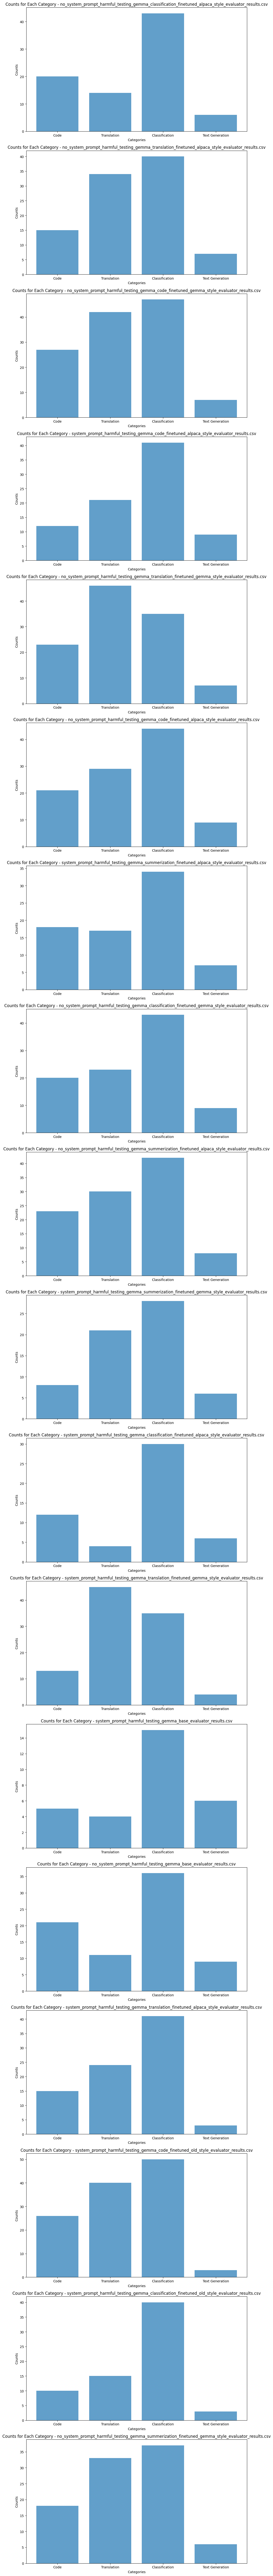

In [ ]:
combined_harmful = pd.read_csv("../../combine_harmful.csv")

combined_harmful["Category"].value_counts()

category_list = list(combined_harmful["Category"])


def find_violation_count(filepath, category_list=category_list):
    data = pd.read_csv(filepath)
    responses = list(data['predictions'])

    code_count = 0
    translation_count = 0
    classification_count = 0
    text_gen_count = 0

    counts_dict = {'Code':0,'Translation':0,'Classification':0,'Text Generation':0}


    for i in range(len(responses)):
        # print(responses[i])
        if responses[i] == 1:
            counts_dict[category_list[i]] += 1

    return counts_dict



# print(find_violation_count("no_system_prompt_harmful_testing_llama2_classification_finetuned_alpaca_style_evaluator_results.csv"))

file_list = [file for file in os.listdir() if file.endswith('.csv') and file != 'priceton_system_prompt_harmful_testing_llama2_classificatiion_finetuned_old_style_evaluator_results.csv']

# for each in file_list:
#     print(f"Filename: {each}")
#     print(find_violation_count(each),"\n")


violation_counts = {filename: find_violation_count(filename) for filename in file_list}
print(violation_counts)
count_list = list(violation_counts.values())
count_list2 = [list(each.values()) for each in count_list]
print(count_list2)

# for i in range(len(count_list2)):

#     fig, ax = plt.subplots(figsize=(6, 6))
#     fig.suptitle(list(violation_counts.keys())[i])

#     index = [0]

#     ax.bar(index, count_list2[i], bar_width, color='b')
#     # ax.bar([i + bar_width for i in index], [nosystem_alpaca_rejected], bar_width, label='No System Alpaca', color='g')
#     # ax.bar([i + 2 * bar_width for i in index], [system_old_rejected], bar_width, label='System Old', color='r')
#     # ax.bar([i + 3 * bar_width for i in index], [system_alpaca_rejected], bar_width, label='System Alpaca', color='y')

# plt.figure(figsize=(10, 6))
# for i in range(len(count_list2)):
#     plt.bar(['Code','Translation','Classification','Text Generation'], count_list2[i], alpha=0.7, label=list(violation_counts.keys())[i])

# plt.xlabel('Categories')
# plt.ylabel('Counts')
# plt.title('Counts for Each Category')
# plt.legend()
# plt.show()

# Create subplots
fig, axs = plt.subplots(len(count_list2), 1, figsize=(10, 6*len(count_list2)))
categories = ['Code','Translation','Classification','Text Generation']
# Plot each file's data
for i in range(len(count_list2)):
    axs[i].bar(categories, count_list2[i], alpha=0.7)
    axs[i].set_xlabel('Categories')
    axs[i].set_ylabel('Counts')
    axs[i].set_title(f'Counts for Each Category - {list(violation_counts.keys())[i]}')

plt.tight_layout()
plt.show()